# Figure Generation Notebook - Tissue Piechart figure

This notebook generates a single figure, a tissue piechart figure

## Figures (PDF files) created by this notebook
Output PDF Figures are written to the ``pdf/`` directory.

**tissue-piechart.pdf**: Plot showing number of tissues-per gene with AS events


In [1]:
defaultW <- getOption("warn")  # suppress warnings for this cell
options(warn = -1) 

library(dplyr)
library(ggplot2)
library(multtest)
library(Biobase)
library(tibble)
library(R.utils)
library(rtracklayer)

options(warn = defaultW)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: BiocGenerics

Loading required package: parallel


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB


The following objects are masked from ‘package:dplyr’:

    combine, intersect, setdiff, union


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
 

### 1. Read in all alternatively spliced events

In [13]:
filename <- "../data/gene_as.tsv"
gene_as <- read.table(filename, header=TRUE, sep="\t",
                               skipNul=FALSE, stringsAsFactors = FALSE)
head(gene_as,2)

,GeneJunction,ASE,ASE_IDX,Tissue,counts,Display,GeneSymbol,GeneID,chr,logFC,AveExpr,t,PValue,AdjPVal,B
,<chr>,<chr>,<int>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,XIST-2253,A3SS,2253,adipose_subcutaneous,4,Adipose (sc),XIST,ENSG00000229807.11,chrX,-4.408605,3.196317,-36.48897,4.635568e-154,3.893877e-150,310.0160
2,XIST-2252,A3SS,2252,adipose_subcutaneous,4,Adipose (sc),XIST,ENSG00000229807.11,chrX,-2.414713,3.647690,-21.92106,1.444102e-78,6.065229e-75,160.0282


### 2. Pie chart
Show recurrent vs unique splicing events with a piechart.

Tissue specific 1 tissue
Tissue group 2-5 tissues
Recurrent > 5 tissues

In [14]:
# Colors for uniformity
# Let's use the following colors for uniformity
darkblue <- "#3c5488"
red <- "#e64b35"
nearlyblack <- "#040C04"
purple <- "#790079"
orange = "#ff9900"

In [15]:
# Count most frequent spliced genes
res <- gene_as %>% group_by(GeneSymbol) %>% count(GeneSymbol) %>% arrange(desc(n)) %>% as.data.frame()
res$GeneSymbol <- factor(res$GeneSymbol, levels = res$GeneSymbol)
length(res$GeneSymbol)

#Add number of tissues
nTissues <- rep(NA, length(res))
for (i in 1:nrow(res)) {
  df_gene <- gene_as %>% filter(GeneSymbol == res$GeneSymbol[i])
  nTissues[i] <- length(unique(df_gene$Tissue))
}
res$Tissues <- nTissues

[1] 2887

In [16]:
head(res)

,GeneSymbol,n,Tissues
,<fct>,<int>,<int>
1,XIST,342,39
2,DDX3X,97,20
3,KDM5C,47,33
4,ZFX,47,27
5,KDM6A,27,24
6,UCA1,25,1


In [18]:
#Pie chart - Number of patients with 0, 1, >1 events
counts <- c(res %>% filter(Tissues == 1) %>% count() %>% as.numeric(),
            res %>% filter(Tissues > 1 & Tissues < 6) %>% count() %>% as.numeric(),
            res %>% filter(Tissues > 5) %>% count() %>% as.numeric())

In [19]:
counts

[1] 2572  303   12

In [20]:
piecolors <- c(darkblue,red,orange)

Calculate the percentage for each category

In [21]:
counts_labels <- round(counts/sum(counts) * 100, 1)
counts_labels <- paste("(",counts_labels,")", "%", sep="")
counts_labels <- paste(counts, counts_labels,sep =" ")

png 
  2

Wrote file to ../pdf/tissue-piechart.pdf



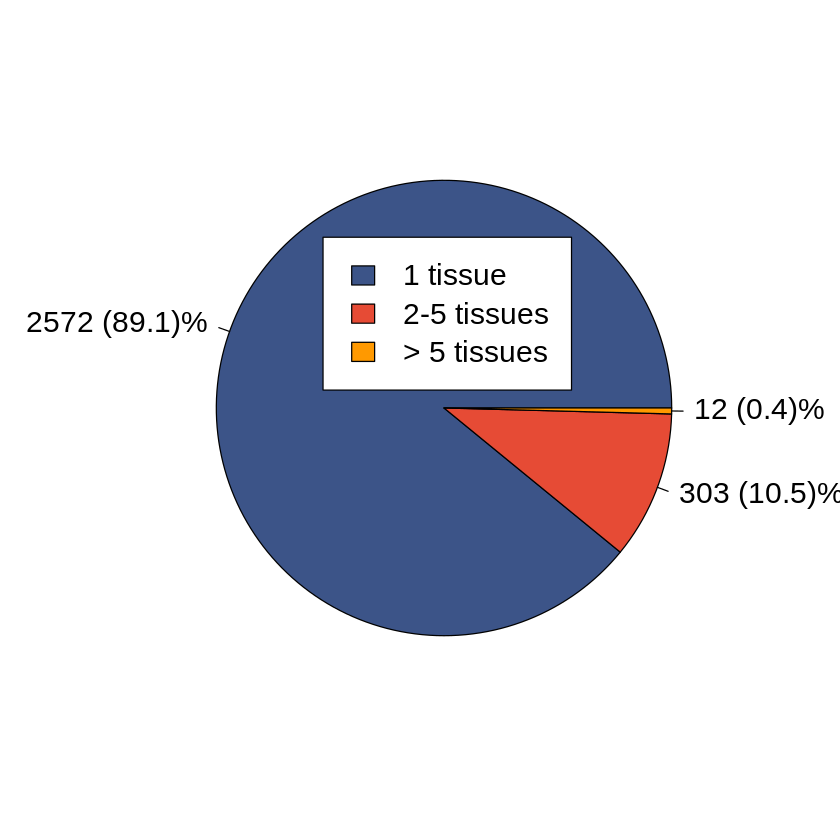

In [23]:
pdf("../pdf/tissue-piechart.pdf")
pie(counts, main="", col=piecolors, labels=counts_labels, cex=1.5)
# Create a legend at the right   
legend(-.425,0.6, c("1 tissue","2-5 tissues","> 5 tissues"), cex=1.5, 
       fill=piecolors, bg="white")
dev.off()
message("Wrote file to ../pdf/tissue-piechart.pdf")
pie(counts, main="", col=piecolors, labels=counts_labels,
    cex=1.5)
# Create a legend at the right   
legend(-.425,0.6, c("1 tissue","2-5 tissues","> 5 tissues"), cex=1.5, 
       fill=piecolors, bg="white")

### Appendix - Metadata

For replicability and reproducibility purposes, we also print the following metadata:

1. Checksums of **'artefacts'**, files generated during the analysis and stored in the folder directory **`data`**
2. List of environment metadata, dependencies, versions of libraries using `utils::sessionInfo()` and [`devtools::session_info()`](https://devtools.r-lib.org/reference/session_info.html)

### Appendix 1. Checksums with the sha256 algorithm

In [24]:
notebookid   = "create_tissue_piechart_figure"
notebookid


Warning message in rm(notebookid):
“object 'notebookid' not found”


[1] "create_tissue_piechart_figure"

### Appendix 2. Libraries metadata

In [25]:
dev_session_info   <- devtools::session_info()
utils_session_info <- utils::sessionInfo()

message("Saving `devtools::session_info()` objects in ../metadata/devtools_session_info.rds  ..")
saveRDS(dev_session_info, file = paste0("../metadata/", notebookid, "_devtools_session_info.rds"))
message("Done!\n")

message("Saving `utils::sessionInfo()` objects in ../metadata/utils_session_info.rds  ..")
saveRDS(utils_session_info, file = paste0("../metadata/", notebookid ,"_utils_info.rds"))
message("Done!\n")

dev_session_info$platform
dev_session_info$packages[dev_session_info$packages$attached==TRUE, ]

Saving `devtools::session_info()` objects in ../metadata/devtools_session_info.rds  ..

Done!


Saving `utils::sessionInfo()` objects in ../metadata/utils_session_info.rds  ..

Done!




 setting  value                       
 version  R version 3.6.2 (2019-12-12)
 os       Ubuntu 18.04.3 LTS          
 system   x86_64, linux-gnu           
 ui       X11                         
 language en_US.UTF-8                 
 collate  en_US.UTF-8                 
 ctype    en_US.UTF-8                 
 tz       Etc/UTC                     
 date     2020-06-22                  

,package,ondiskversion,loadedversion,path,loadedpath,attached,is_base,date,source,md5ok,library
,<chr>,<chr>,<chr>,<chr>,<chr>,<lgl>,<lgl>,<chr>,<chr>,<lgl>,<fct>
Biobase,Biobase,2.46.0,2.46.0,/opt/conda/lib/R/library/Biobase,/opt/conda/lib/R/library/Biobase,TRUE,FALSE,2019-10-29,Bioconductor,NA,/opt/conda/lib/R/library
BiocGenerics,BiocGenerics,0.32.0,0.32.0,/opt/conda/lib/R/library/BiocGenerics,/opt/conda/lib/R/library/BiocGenerics,TRUE,FALSE,2019-10-29,Bioconductor,NA,/opt/conda/lib/R/library
dplyr,dplyr,0.8.4,0.8.4,/opt/conda/lib/R/library/dplyr,/opt/conda/lib/R/library/dplyr,TRUE,FALSE,2020-01-31,CRAN (R 3.6.2),NA,/opt/conda/lib/R/library
GenomeInfoDb,GenomeInfoDb,1.22.0,1.22.0,/opt/conda/lib/R/library/GenomeInfoDb,/opt/conda/lib/R/library/GenomeInfoDb,TRUE,FALSE,2019-10-29,Bioconductor,NA,/opt/conda/lib/R/library
GenomicRanges,GenomicRanges,1.38.0,1.38.0,/opt/conda/lib/R/library/GenomicRanges,/opt/conda/lib/R/library/GenomicRanges,TRUE,FALSE,2019-10-29,Bioconductor,NA,/opt/conda/lib/R/library
ggplot2,ggplot2,3.2.1,3.2.1,/opt/conda/lib/R/library/ggplot2,/opt/conda/lib/R/library/ggplot2,TRUE,FALSE,2019-08-10,CRAN (R 3.6.1),NA,/opt/conda/lib/R/library
IRanges,IRanges,2.20.0,2.20.0,/opt/conda/lib/R/library/IRanges,/opt/conda/lib/R/library/IRanges,TRUE,FALSE,2019-10-29,Bioconductor,NA,/opt/conda/lib/R/library
multtest,multtest,2.42.0,2.42.0,/opt/conda/lib/R/library/multtest,/opt/conda/lib/R/library/multtest,TRUE,FALSE,2019-10-29,Bioconductor,NA,/opt/conda/lib/R/library
R.methodsS3,R.methodsS3,1.8.0,1.8.0,/opt/conda/lib/R/library/R.methodsS3,/opt/conda/lib/R/library/R.methodsS3,TRUE,FALSE,2020-02-14,CRAN (R 3.6.3),NA,/opt/conda/lib/R/library
